## Machine Learning

- computational and algorithmic skills meet statistical thinking
- approaches to inference and data exploratuin
- building models of data

#### Learn about:
- fundamental vocabulary and concepts of machine learning
- use Scikit-Learn API library and some examples for use
- deep dive machine learning approaches

## Categories of Machine Learning

### A. Supervised Learning:
modeling relationship between measured features of data and some label associated with the data

#### 1) Classification
- the labels are discrete categories

#### 2) Regression
- continuous quantities

### B. Unsupervised Learning:
modeling features of a dataset without reference to any label

#### 3) Clustering
- identify distinct groups of data

#### 4) Dimensionality reduction
- search for more succinct representations of the data

### C. Semi-supervised learning methods
fall btwn supervised and unsupervised methods
only useful when incomplete labels are available

## Qualitative Eg of ML Applications
- Classification: Predicting discrete labels
- Regression: Predicting continuous labels
- Clustering: Inferring labels on unlabeled data
- Dimensionality reduction: Inferring structure of unlabeled data

### Classification: Predicting discrete labels

given a set of labeled points and use to classify some unlabeled points
- E.g use 2-d data, which is 2 features of each point represented by (x,y) positions of each points
- create a model to decide points should be labeled 'red' or 'blue'

#### Assumption:
- groups can be separated by drawing a straight line through the plane between them
- quantitive version of statement to separate the classes

#### Training the model:
- learn model parameters from data
- can be generalized to new unlabeled data

#### Prediction
- assign labels to new points based on this model

#### Applied in:
- Naive Bayes Classification (text-based)
- Support Vector Machines
- Decision Trees and Random Forests

### Regression: Predicting continuous labels
Eg.2-d data with features describing each data point
- color of each point represent continuous label
- Different regression models, use simple linear reg in this case

#### Assumption:
- treat the label as third spatial dimension
- fit plane to the 3-d data

#### Prediction
- predict the expected label for any input parameters
- evaluated in case of data with data of many,many features

#### Example:
- feature1, feature2: brightness of galaxy at diff wavelenth
- label : distance or redshift of galaxy

#### Applied in:
- linear Regression
- Support Vector Machines
- Decision Trees and Random Forests


### Clustering: Inferring labels on unlabled data
- data is automatically assigned to some number of discrete groups
- clear that each of these points is part of a distinct group

#### Structure based:
- clear that points are in distinct group
- intrinsic structure

#### Applied in:
- k-Means Clustering
- Gaussian Mixture Models
- Scikit-Learn's Clustering documentation

### Dimensionality reduction: Inferring structure of unlabeled data
- inferred from structure of dataset
- more abstract
- low-dimensional representation of data

#### Applied in:
- Manifold learning
- Principal Component Analysis

#### Example:
Manifold learning shown in Isomap algorithm, with colors changing uniformly along the spiral

#### Visualize:
- important relationships within datasets with 100 or 1,000 features
- reduce the data to 2 or 3 dimensions

### Introducing Scikit-Learn
- streamlined API
- data representation in Scikit-Learn

### Data Representation in Scikit-Learn

#### Data as Table
- 2-d grid of table
- row represent individuals
- column represent quantities of the diff features

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

#each row refer to a sample 
#total rows = total number of samples

#number of rows as n_samples
#number of columns as n_features

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Features matrix
- each row refer to a sample 
- total rows = total number of samples
- number of rows as n_samples

- features refer to distinct observations
- number of columns as n_features

- 2-d shape [n_samples, n_features]

#### Target array
- label or target array
- 1-dimensiaon with length n_samples
- can have discrete classes/labels or continuours numerical values

#### target array differ from feature columns
- target array is the quantity we want to predict from data
- dependable variable
- in this case, species column consider as feature

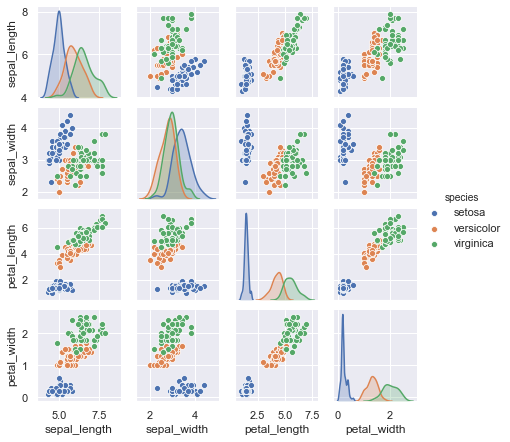

In [3]:
# use Seabron to visualize the data

%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
#For use in Scikit-Learn
#extract the features matrix and target array from DataFrame

#feature matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
#target array
y_iris = iris['species']
y_iris.shape

(150,)

### Scikit-Learn's Estimator API

- Consistency
- Inspection
- Limited object hierachy
- composition
- sensible defaults

### Basics of API

1. choose clase of model from Scikit-Learn
2. chose model hyperparameters by instantiating this class with desired values
3. Arrange data into features matrix and target vector
5. fit model to data by calling the fit() method of model instance
6. Apply model to new data:
- supervised: predict labels for unknown data using predict()
- unsupervised: transform or infer using transform() or predict()

### Supervised Learning example: Simple linear regression

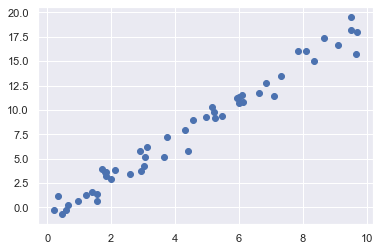

In [8]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10* rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x,y)

### 1. Choose a class of model
in Scikit-Learn, every class of model is represented by Python class

In [9]:
from sklearn.linear_model import LinearRegression

### 2. Choose model hyperparameters

class of model is different as instance of model

open options:
    1. would we like to fit for the offset?
    2. would model be normalized?
    3. preprocess features to add model flexibility?
    4. degree of regularization for model?
    5. how many model components to use?
    
Hyperparametes must be made once model class is selected

#### For this example:

- instantiate the LinearRegression class
- fit the intercept using fit_intercept hyperparameter
- only action is storing hyperparameter values
- have not applied any model to Data

#### Scikit-Learn API:
makes clear the distinction between choice of model and application of model to data

In [10]:
model = LinearRegression(fit_intercept=True)

model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 3. Arrange the data into features matrix and target vector

in this example:
1. target variable y is already in correct form( a length- n_samples array)
2. but have to massage data x to make it a matrix of [n_samples, n_features]


In [11]:
X = x[:, np.newaxis]
X.shape

(50, 1)

### 4. Fit Model to data

Time to apply model to data using fit()

In [12]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
model.coef_

#very close to input slope of 2

array([1.9776566])

In [14]:
model.intercept_

#very close to intercept of -1

-0.9033107255311164

### 5. Predict labels for unknown data
- model is trained, evaluate using new data not part of training model
- in Sci-Learn, use predict() method
- use "new data" with a grid of x labels

In [15]:
xfit = np.linspace(-1,11)
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

- coerce these x values in a [n_samples, n_features] features model

In [16]:
Xfit = xfit[:, np.newaxis]

In [17]:
Xfit

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [18]:
yfit = model.predict(Xfit)
#yfit is predicted based on Xfit

- visualise the results by plotting the raw data
- then plot the new model fit(predicted earlier, yfit)

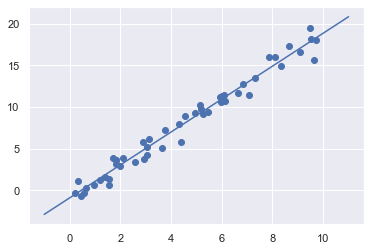

In [19]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

#simple linear regression fit to the data

- evaluate the efficacy of model by comparing its results to some baseline

### Supervised learning example: Iris classification

- Naive Bayes classification is a good model for baseline classification
- later on can explore other models for exploration

- evaluate the model by splitting the data into training and testing set
- use train_test_split utility function

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris,y_iris, random_state=1)

In [21]:
# 1. Choose the model class
from sklearn.naive_bayes import GaussianNB
# Gaussian Bayes from Naive bayes classification

# 2. Instantiate the model
model = GaussianNB()

# 3. fit model to data
model.fit(Xtrain,ytrain)

# 4. predict on new data
y_model=model.predict(Xtest)

- use accuracy_score to see if fraction of predicted labels match their true value

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

#this shows that accuracy is 97% for using naive classification algo

0.9736842105263158

### Unsupervised learning example: Iris dimensionality

- reducing the dimensionality of the Iris data to visualize easily
- Iris data is 4 dimensional: there are 4 features recorded for each sample
    
- suitable dimensional representation for essentail features of the data

- use PCS Principal Component Analysis for fast linear dimensionality reduction
- return the model to 2 components, 2-d representation of data

In [23]:
# 1. Choose the model class and import
from sklearn.decomposition import PCA

# 2. Instantiate the model with hyperparameters
model = PCA(n_components = 2)

# 3. Fit to data. Notice y is not specified.
model.fit(X_iris)

# 4. Transform the data to 2-dimensions
X_2D = model.transform(X_iris)


- insert results into original Dataframe

In [24]:
iris['PCA1'] = X_2D[:,0]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1
0,5.1,3.5,1.4,0.2,setosa,-2.684126
1,4.9,3.0,1.4,0.2,setosa,-2.714142
2,4.7,3.2,1.3,0.2,setosa,-2.888991
3,4.6,3.1,1.5,0.2,setosa,-2.745343
4,5.0,3.6,1.4,0.2,setosa,-2.728717
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110
146,6.3,2.5,5.0,1.9,virginica,1.527167
147,6.5,3.0,5.2,2.0,virginica,1.764346
148,6.2,3.4,5.4,2.3,virginica,1.900942


In [25]:
iris['PCA2'] = X_2D[:,1]
iris

,sepal_length,sepal_width,petal_length,petal_width,species,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,-2.728717,0.326755
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1.944110,0.187532
146,6.3,2.5,5.0,1.9,virginica,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,virginica,1.764346,0.078859
148,6.2,3.4,5.4,2.3,virginica,1.900942,0.116628


- use Seaborn's lmplot to show results

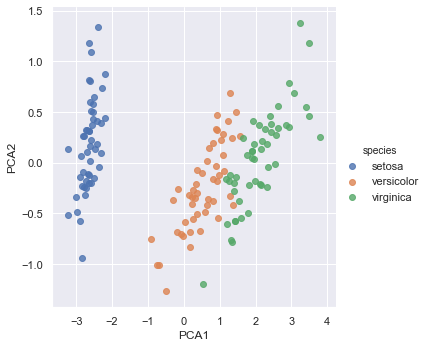

In [26]:
sns.lmplot('PCA1','PCA2',hue='species', data=iris, fit_reg=False)

- in a 2-dimensional representation, the species are fairly well separated.
- Even though PCA algorithm has no knowlege of species label
- shows a straightforward classification in dataset

### Unsupervised learning: Iris clustering

- apply clustering to the Irus Data
- find distinct groups of data without ref to any labels
- use GMM - Gaussian Mixture Model

In [27]:
# 1. Choose the model class
from sklearn.mixture import GaussianMixture as GMM

# 2. Instantiate model with hyperparameters
model = GMM(n_components = 3, covariance_type ='full')

# 3. Fit to Data, Notice y is not specified
model.fit(X_iris)

# 4. Determine cluster labels
y_gmm = model.predict(X_iris)

- add cluster label to Iris Dataframe

In [43]:
iris['cluster'] = y_gmm

- use Seaborn to plot results

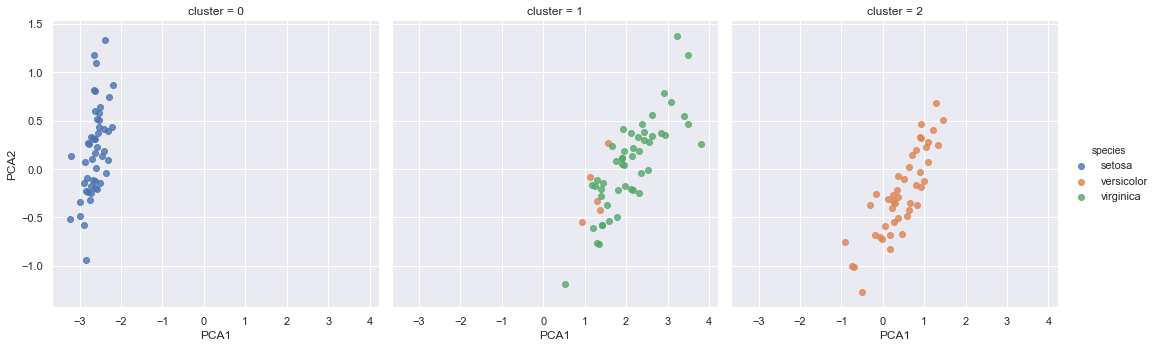

In [44]:
sns.lmplot('PCA1','PCA2',data=iris, hue='species', col='cluster', fit_reg=False)

- split data by cluster number
- can see how the GMM algorithm recover the underlying label
- measurements of floers are distinct enough to automatically identify differnt species using the clustering algo


### Application: Exploring Handwritten Digits

- optical character recognition problem
- the identification of handwritten digits
- use Scikit-Learn set of preformatted digits from library

In [45]:
# Loading and visualizing the digits data

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

- images data is a 3-dimensional array.
- 1797 samples
- each consist of a 8x8 grid pixels
- Visualise the 1st hundred

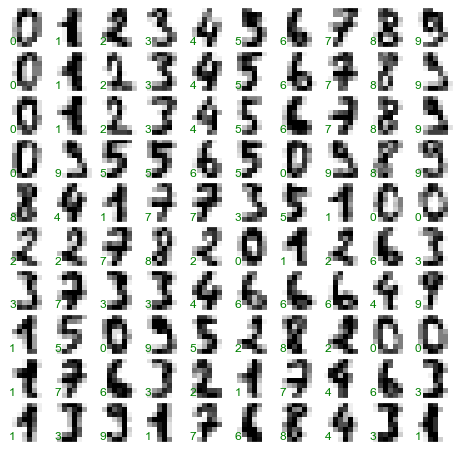

In [46]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize= (8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

#above the the 10 by 10 subplot

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
           transform=ax.transAxes, color='green')


- To work with data within Scikit-Learn
- need 2-dimensional [n_samples, n_features] representation
- flattening the pixel arrays, so that
- length-64 array of pixel values for each digit

In [47]:
X = digits.data
X.shape

(1797, 64)

In [48]:
y = digits.target
y.shape

(1797,)

#### Unsupervised learning: Dimensionality reduction

- visualize and reduce dimensions from 64 to 2
- use a manifold learning algorithm called Isomap
- need to transform the data to 2 dimensions first

In [49]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

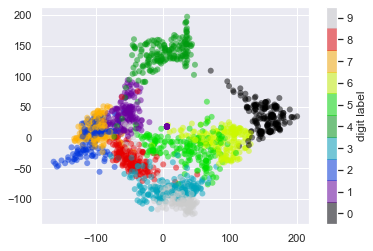

In [50]:
plt.scatter(data_projected[:,0], data_projected[:, 1], c=digits.target,
           edgecolor = 'none', alpha =0.5, cmap=plt.cm.get_cmap('nipy_spectral',10))

plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

- gives good intuition how the various numbers are separated
- in a 64-dimensional space
- shows that it can seperated in straightforward supervised classification

#### Classification on digits

- apply classification algorithm to the digits
- split the data into training and test set, use Gaussian naive Bayes model

In [51]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [52]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest, y_model)

0.8333333333333334

- 80% accuracy for classification
- check where went wrong using confusion matrix
- compute with Scikit-Learn and plot with Seaborn

Text(89.18, 0.5, 'true value')

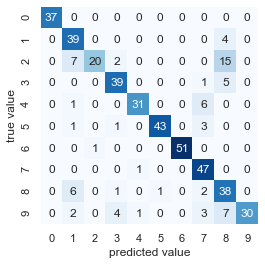

In [53]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cmap = 'Blues', cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value')

- show where the mislabeled points are with predicted labels
- green for correct labels, red for incorrect labels


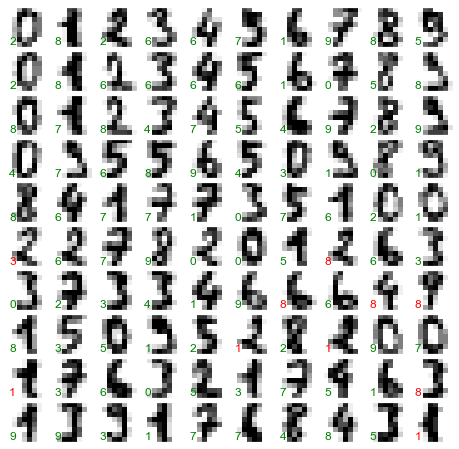

In [54]:
fig, axes = plt.subplots(10, 10, figsize=(8,8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
           transform=ax.transAxes,
           color='green' if (ytest[i] == y_model[i]) else 'red')

### Hyperparameters & Model Validation

1. Choose class of model
2. Choose model hyperpatameters
3. Fit the model to the training data
4. Use the model to predict labels for new data


### why
- need to find a way to validate the model
- choise of hyperparameters to be a good fit to data

### Thinking about Model Validation
- explore the use of holdout sets and cross-validation for robust model evaluation.

### Model Validation the right way: Holdout sets

- hold back some subset of data from training data
- use holdout set to check model performance
-split data using train_test_split utility from Scikit-Learn

In [55]:
from sklearn.model_selection import train_test_split
 #split the data with 50% in each set
    
    
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, 
                                       train_size=0.5)
    
#fit the model on 1 set of data
model.fit(X1, y1)
    
#evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.8342602892102335

### Model Validation via cross-validation

- cross validation
- so each subset of data can be used as both training and validation set and vice versa

#### Use 2 validations trails
- each half use as training and validations

In [56]:
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)


(0.844097995545657, 0.8342602892102335)

####  five-fold cross-validation

- split the data into five groups
-use scikit-Learns cross_val_score with cv argument

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.78055556, 0.78333333, 0.79387187, 0.8718663 , 0.80501393])

#### number offolds is equal to the number of data points
that is, we train on all points but one in each trial

In [58]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 0., ..., 1., 1., 1.])

In [59]:
scores.mean()

0.8408458542014469

### Selecting the Best model

If estimator is underperforming, how to move forward?
- use a more complicated/ more flexible model
- use a less complicated/ less flexible model
- Gather more training samples
- Gather more data to add features to each sample


#### The bias-variance trade-off
- 'the best models'
- sweet spot in the trade off between bias and variance

### High bias model: underfts the data
- attempts to find a straight-line fit though the data
- underfit the data
- does not have enough model flexibility
- Validation set is similar to performance on training set
- poor predictor for training data and for unseen data

### High variance regression model: overfits the data
- attempts to fit a high-order polynomial through the data
- enough flexibility to fit every point
- over fit the data
- so much model flexibility that it accounts for random errors
- Validation set is far worse than performance on training set
- predict training data very well but fails unseen data

### Training score vs Validation score
- Training score is higher everywhere than the validation score

#### Validation curves in Scikit-Learn

- cross-validation to compute the validation curve
- use polynomail regression model
- generalize linear model where degree of polynomial is a tunable parameter
- can use degree-1 or degree-3 polynomial to fit line

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PR(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))

In [61]:
#Create some date to fit out model

import numpy as np

def make_data(N, err=1.0, rseed=1):
    #randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1./ (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

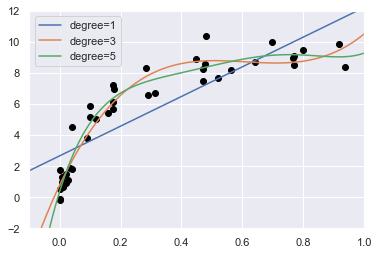

In [62]:
# Visualize data with polynomial fits of several degree

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() #plot formatting

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PR(degree).fit(X, y). predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')

### Validation Curve
- progress in this by visualizing the validation curve 
- given a model, data, parameter name and a range to explore

Text(0, 0.5, 'score')

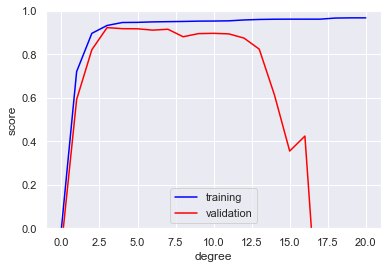

In [63]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)

train_score, val_score = validation_curve(PR(), X, y, 'polynomialfeatures__degree', degree, cv=7)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation')

plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score')

From validation curve, find the optimal trade-off between bias and vairance for 3rd order polynomial

(-0.05673314103942452,
 0.994263633135634,
 -0.7459943120970807,
 10.918045992764213)

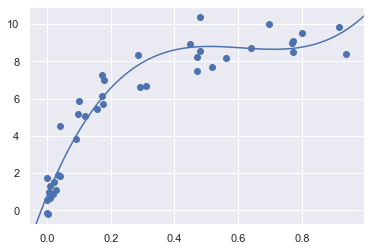

In [64]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PR(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

- Finding the optimal model did not require computing the training score
- but examining relationship between training and validation score
-for insight of model performance

### Learning Curves

- model complexity is the optimal model is size of training data

In [1]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2)

NameError: name 'make_data' is not defined

duplicate the preceding code to plot the validation cure for larger data set
- for reference over-plot the previous results as well

Text(0, 0.5, 'score')

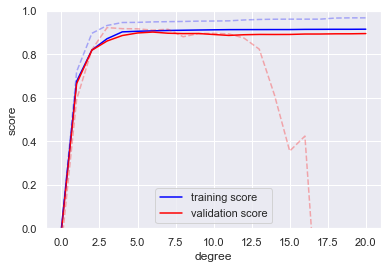

In [66]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(PR(), X2, y2, 'polynomialfeatures__degree',
                                           degree, cv=7)

plt.plot(degree, np.median(train_score2, 1), color='blue',
        label='training score')

plt.plot(degree, np.median(val_score2, 1), color='red',
        label='validation score')

plt.plot(degree, np.median(train_score, 1), color='blue',
        alpha = 0.3, linestyle = 'dashed')

plt.plot(degree, np.median(val_score, 1), color='red',
        alpha = 0.3, linestyle = 'dashed')

plt.legend(loc = 'lower center')
plt.ylim(0,1)
plt.xlabel('degree')
plt.ylabel('score')

 - Solid lines show the new results
 - fainter dashed lines show the results of smaller data set
 
 - Larger dataset can support a much complicated model

### Model complexity & the number of training points
 - explore behaviour of model
 - by increasing larger subset of data to fit our model 
 
 #### A model of a given complexity
 - Overfit a small dataset: training score is high while validation score is low
 -
 - Underfit a larger dataset: training score will decrease while validation score is increase
 
##### Training set will always be higher than validation set, Curve will keep getting closer together but never cross.


### Training score and Validation score will converge but adding more training data will not help further!!!

### Learning curves in Scikit-Learn

- compute a learning curve for original dataset
- using 2nd-order and ninth-order polynomial

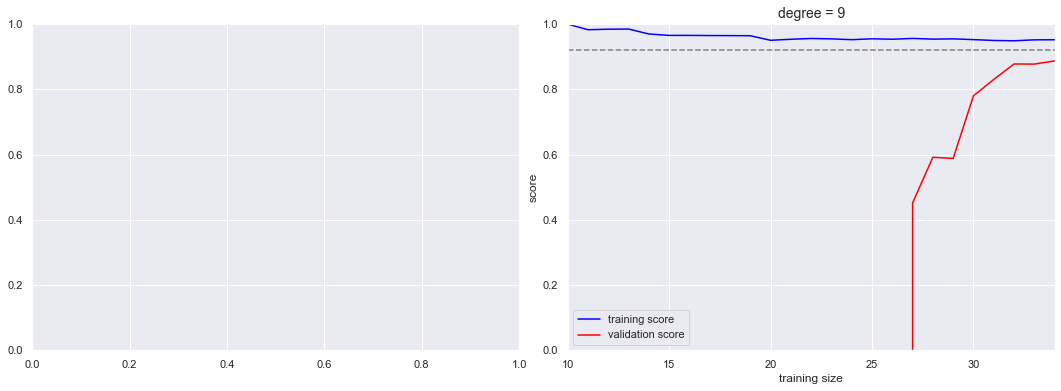

In [67]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PR(degree),
                                         X, y , cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))

ax[i].plot(N, np.mean(train_lc,1), color='blue', label='training score')
ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')    
ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
            color='gray', linestyle='dashed')
    
    
ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc='best')  

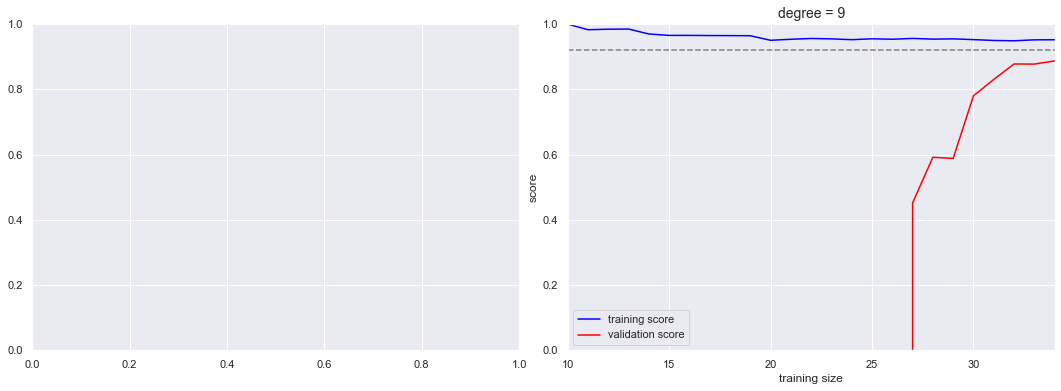

In [68]:
from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PR(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))
 
ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray',
 linestyle='dashed')

ax[i].set_ylim(0, 1)
ax[i].set_xlim(N[0], N[-1])
ax[i].set_xlabel('training size')
ax[i].set_ylabel('score')
ax[i].set_title('degree = {0}'.format(degree), size=14)
ax[i].legend(loc='best')  

- model responds to increasing training data
- learning curve is already convereged
- adding more training data will not significantly improve the fit
- the only way to increase the converged score is to use a diff model

### Validation in Practice: Grid Search

- trade-off between bias and variance
- dependance on model complexity
- training set size

#### Use grid_search model
- to find the optimal ploynomial model
- explore a 3-d grid of model features
- polynomial degree
  - whether to fit the intercept
  - whether to normalize the problem

In [69]:
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept':[True, False],
             'linearregression__normalize':[True, False]}

grid = GridSearchCV(PR(), param_grid, cv=7)

In [70]:
grid.fit(X,y)

GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('polynomialfeatures',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('linearregression',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                         normalize=False))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearre

In [71]:
#now that it is fit, ask for the best parameters as follows

grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

AttributeError: 'Line2D' object has no property 'hold'

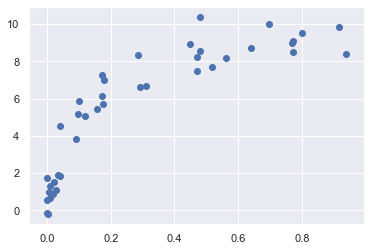

In [73]:
#use the best model and show the fit to our data

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim)

AttributeError: 'Line2D' object has no property 'hold'

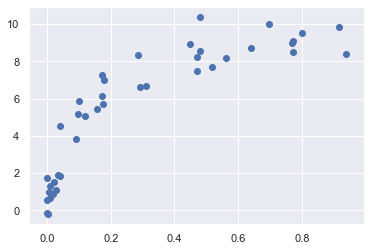

In [74]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test, hold=True);
plt.axis(lim);


### Feature Engineering 
features for representing:
- categorical data
- text
- image
- derived features for increasing model complexity and imputation of missing data

#### Categorical features
non-numerical data

In [75]:
 data = [
 {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
 {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
 {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
 {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}]

In [77]:
from sklearn.feature_extraction import DictVectorizer

vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [78]:
## To see the meaning of each column, inspect the feature names

vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [79]:
vec = DictVectorizer(sparse= True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

### Text Features
convert text to a set of representative numerical values

In [80]:
sample = ['problem of evil',
 'evil queen',
 'horizon problem']

In [81]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [83]:
# result is the sparse matric recording the word appears
# convert to DataFram with labeled columns

pd.DataFrame(X.toarray(), columns =vec.get_feature_names())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


- raw word count may lead to too much weight on certain words
- suboptimal in some classification algorithms

#### Use frequency–inverse document frequency (TF–IDF)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


### Image Features
- in an older chapter

### Derived Features

- mathematically derived from some input features
- convert a linear regression into a polynomial regression not by changing the model but by transforming the input

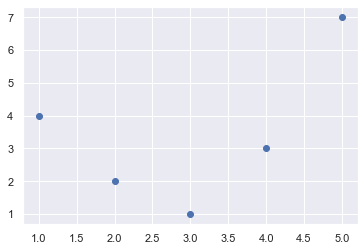

In [88]:
#for example data cannot be well described by a straight line

%matplotlib inline
import numpy as np
import matplotlib.pyplot as ply

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y)


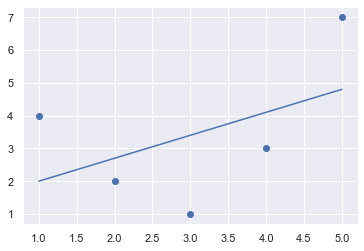

In [90]:
#fit the above line into data using LinearRegression 
# and get optimal results

from sklearn.linear_model import LinearRegression

X = x[:, np.newaxis]
model = LinearRegression().fit(X,y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit)

In [93]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)


[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


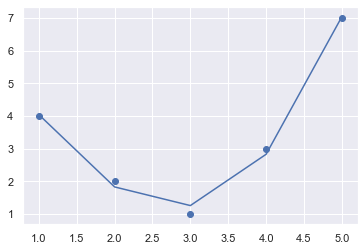

In [94]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit)

### Inputation of Missing Data
- handling of missing data in DataFrame
- use NaN to mark missing values

In [95]:
from numpy import nan

X = np.array([[nan, 0, 3],
              [ 3, 7 ,9 ],
              [ 3, 5, 2 ],
              [ 4, nan, 6 ],
              [ 8, 8, 1 ]])

y = np.array([14, 16, -1, 8, -5])

- replace such missing data with some appropriate fill val
- inputation of missing values

In [97]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
X2 = imp.fit_transform(X)

X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

 - the above 2 missing values have been replaced with mean of remaining values in the column
 - inputed data can be fed directly into a LinearRegression estimator

In [98]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

### Feature pipelines

- if wish to string together multiple steps
- processing pipelines

1. Input missing values using the mean
2. Transform features to quadratic
3. Fit a linear regression

In [102]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

In [103]:
# pipeline looks and acts like a Scikit-Learn object
# apply all specified steps to any input data

model.fit(X, y)
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]
